### Tennessee opioid risk modeling 
Normal adjacency matrix - Dimentions would be different.
Adding the feature to find the bearth of death of each feature!

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
tn_svi_nod = gpd.read_file('./data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu/SVI2018_TN_census_tracts_with_death_rate_HepVu.shp')

In [3]:
selected_variables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']
selected_variables_without_y = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']
selected_variables_tn_with_geo = ['FIPS','EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate','geometry']
selected_variables_tn = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV']
selected_variables_tn_with_od = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate']

In [4]:
# get the number of rows with 999 or -999 values in the selected_variablesWy_ columns
rows_with_n999 = tn_svi_nod[(tn_svi_nod['EP_DISABL'] == -999) | (tn_svi_nod['EP_NOHSDP'] == -999) | (tn_svi_nod['EP_PCI'] == -999) | (tn_svi_nod['EP_MOBILE'] == -999) | (tn_svi_nod['EP_POV'] == -999)].shape[0]

In [9]:
rows_with_n999

23

In [5]:
# drop rows with -999 values in the selected_variables columns
tn_svi_nod = tn_svi_nod[(tn_svi_nod['EP_DISABL'] != -999) & (tn_svi_nod['EP_NOHSDP'] != -999) & (tn_svi_nod['EP_PCI'] != -999) & (tn_svi_nod['EP_MOBILE'] != -999) & (tn_svi_nod['EP_POV'] != -999)]

In [6]:
# # if value equals -999, replace with 0 in selected_variablesWy_
# tn_svi_nod[selected_variables_tn[0]] = tn_svi_nod[selected_variables_tn[0]].replace(-999, 0)
# tn_svi_nod[selected_variables_tn[1]] = tn_svi_nod[selected_variables_tn[1]].replace(-999, 0)
# tn_svi_nod[selected_variables_tn[2]] = tn_svi_nod[selected_variables_tn[2]].replace(-999, 0)
# tn_svi_nod[selected_variables_tn[3]] = tn_svi_nod[selected_variables_tn[3]].replace(-999, 0)
# tn_svi_nod[selected_variables_tn[4]] = tn_svi_nod[selected_variables_tn[4]].replace(-999, 0)

In [7]:
tn_svi_nod[selected_variables_tn_with_geo]

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
21,47001020201,9.2,2.4,50210.0,0.4,4.1,38.3,"POLYGON ((-84.24335 36.00155, -84.24089 36.005..."
22,47001020202,18.0,10.2,42911.0,0.0,17.4,38.3,"POLYGON ((-84.25098 36.00645, -84.24837 36.007..."
23,47001020300,18.8,7.0,25669.0,0.0,8.8,38.3,"POLYGON ((-84.24396 36.04222, -84.23038 36.048..."
24,47001020400,20.1,10.8,22560.0,1.0,27.3,38.3,"POLYGON ((-84.28855 36.02536, -84.28372 36.027..."
25,47001020500,25.9,16.5,19450.0,0.4,28.2,38.3,"POLYGON ((-84.30644 36.01210, -84.30343 36.015..."
...,...,...,...,...,...,...,...,...
1492,47157003200,17.3,6.9,30994.0,0.0,18.7,17.0,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47157003700,23.5,24.1,18683.0,0.0,41.6,17.0,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47157003800,43.4,20.0,14127.0,0.0,56.8,17.0,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47157007300,18.3,11.1,22042.0,0.0,34.8,17.0,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


#### Check the distribution of each selected variable

In [8]:
tn_svi_nod[selected_variables_tn].describe()

,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,16.214654,13.944166,27771.197422,9.369471,17.699796
std,6.024989,7.774142,12399.213583,10.549056,12.004405
min,1.700000,0.000000,3498.000000,0.000000,0.000000
25%,11.900000,7.800000,20738.000000,0.500000,9.200000
50%,16.000000,13.800000,24915.000000,4.800000,15.700000
75%,20.300000,18.900000,31109.250000,17.100000,23.275000
max,43.400000,45.800000,108189.000000,47.300000,75.800000


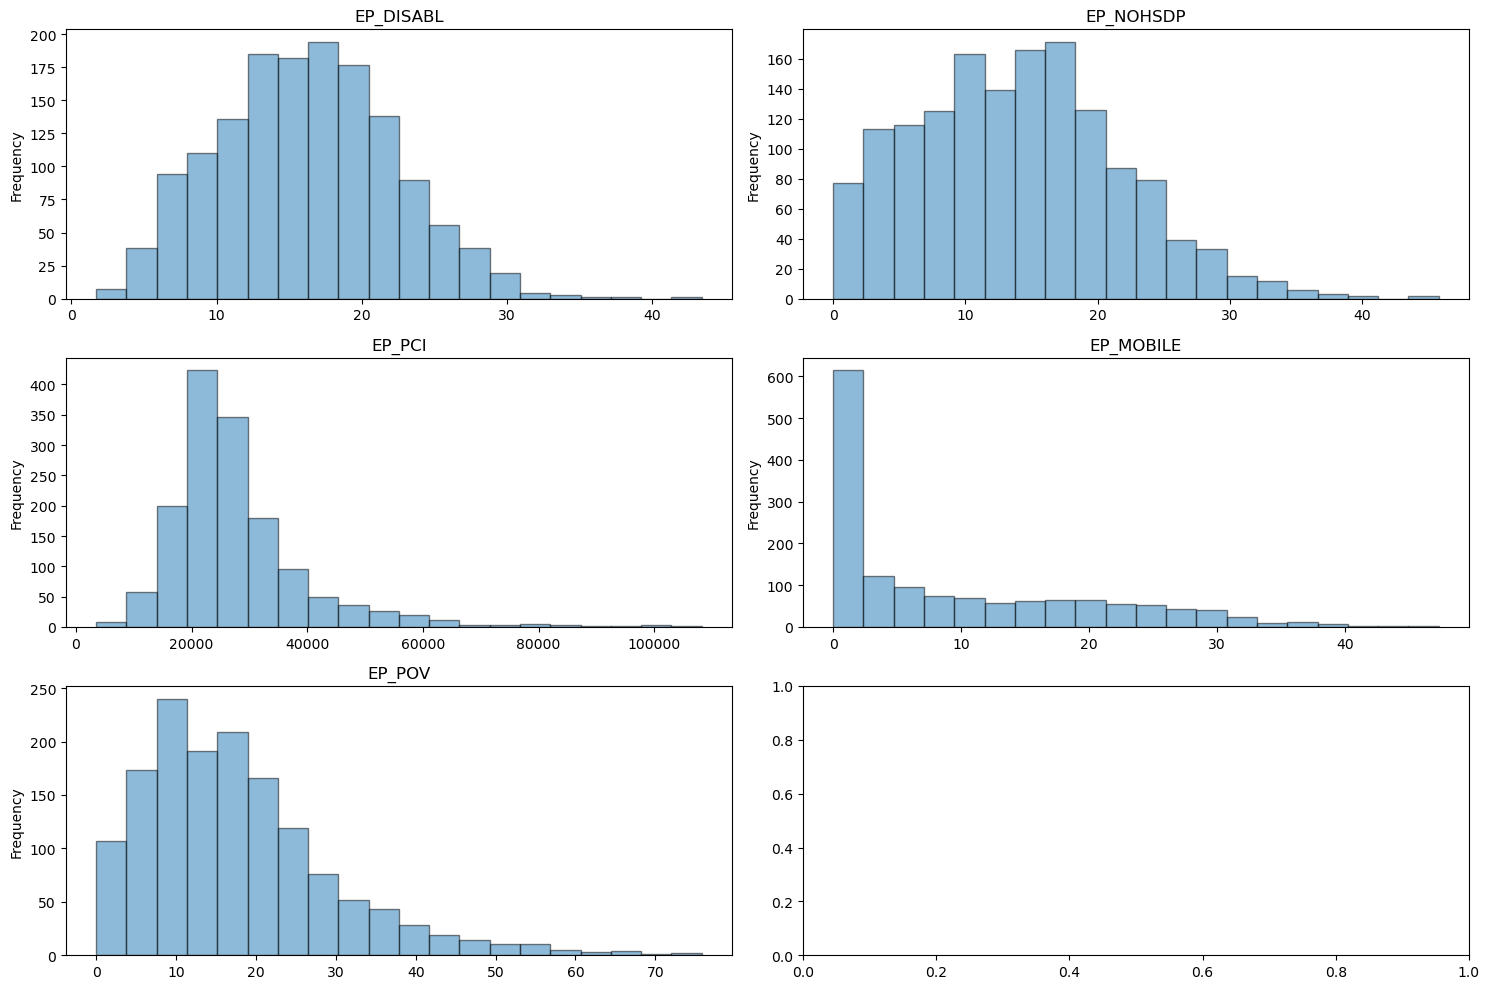

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, ax in zip(selected_variables_tn, axes.flatten()):
    tn_svi_nod[i].plot.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
    ax.set_title(i, fontsize=12)  # Adjust the fontsize here

plt.tight_layout()
plt.show()

In [10]:
# calculate the 50th and 75th and 90th percentile for each variable
variable_1_percentile_50 = tn_svi_nod[selected_variables_tn[0]].quantile(0.5)
variable_1_percentile_75 = tn_svi_nod[selected_variables_tn[0]].quantile(0.75)
variable_1_percentile_90 = tn_svi_nod[selected_variables_tn[0]].quantile(0.9)

variable_2_percentile_50 = tn_svi_nod[selected_variables_tn[1]].quantile(0.5)
variable_2_percentile_75 = tn_svi_nod[selected_variables_tn[1]].quantile(0.75)
variable_2_percentile_90 = tn_svi_nod[selected_variables_tn[1]].quantile(0.9)

variable_3_percentile_50 = tn_svi_nod[selected_variables_tn[2]].quantile(0.5)
variable_3_percentile_75 = tn_svi_nod[selected_variables_tn[2]].quantile(0.75)
variable_3_percentile_90 = tn_svi_nod[selected_variables_tn[2]].quantile(0.9)

variable_4_percentile_50 = tn_svi_nod[selected_variables_tn[3]].quantile(0.5)
variable_4_percentile_75 = tn_svi_nod[selected_variables_tn[3]].quantile(0.75)
variable_4_percentile_90 = tn_svi_nod[selected_variables_tn[3]].quantile(0.9)

variable_5_percentile_50 = tn_svi_nod[selected_variables_tn[4]].quantile(0.5)
variable_5_percentile_75 = tn_svi_nod[selected_variables_tn[4]].quantile(0.75)
variable_5_percentile_90 = tn_svi_nod[selected_variables_tn[4]].quantile(0.9)

In [11]:
# for each selected vcariable wy calculate the number of rows that are below 50th, 75th and 90th percentile
variable_1_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_50].shape[0]
variable_1_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_75].shape[0]
variable_1_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_90].shape[0]

variable_2_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_50].shape[0]
variable_2_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_75].shape[0]
variable_2_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_90].shape[0]

variable_3_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_50].shape[0]
variable_3_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_75].shape[0]
variable_3_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_90].shape[0]

variable_4_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_50].shape[0]
variable_4_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_75].shape[0]
variable_4_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_90].shape[0]

variable_5_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_50].shape[0]
variable_5_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_75].shape[0]
variable_5_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_90].shape[0]

# create a dataframe with the results
data = {'Variable': selected_variables_tn, '50th Percentile': [variable_1_percentile_50, variable_2_percentile_50, variable_3_percentile_50, variable_4_percentile_50, variable_5_percentile_50], '75th Percentile': [variable_1_percentile_75, variable_2_percentile_75, variable_3_percentile_75, variable_4_percentile_75, variable_5_percentile_75], '90th Percentile': [variable_1_percentile_90, variable_2_percentile_90, variable_3_percentile_90, variable_4_percentile_90, variable_5_percentile_90], 'Rows below 50th Percentile': [variable_1_below_50, variable_2_below_50, variable_3_below_50, variable_4_below_50, variable_5_below_50], 'Rows below 75th Percentile': [variable_1_below_75, variable_2_below_75, variable_3_below_75, variable_4_below_75, variable_5_below_75], 'Rows below 90th Percentile': [variable_1_below_90, variable_2_below_90, variable_3_below_90, variable_4_below_90, variable_5_below_90]}
percentile_df = pd.DataFrame(data)

percentile_df

,Variable,50th Percentile,75th Percentile,90th Percentile,Rows below 50th Percentile,Rows below 75th Percentile,Rows below 90th Percentile
0,EP_DISABL,16.0,20.300,24.10,730,1104,1322
1,EP_NOHSDP,13.8,18.900,24.10,733,1100,1323
2,EP_PCI,24915.0,31109.250,41747.40,737,1105,1326
3,EP_MOBILE,4.8,17.100,25.97,736,1104,1326
4,EP_POV,15.7,23.275,33.90,736,1105,1323


### Adjacency Method

In [12]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

In [13]:
tn_filtered = tn_svi_nod[selected_variables_tn_with_geo]

In [14]:
#reset index
tn_filtered = tn_filtered.reset_index(drop=True)

In [15]:
tn_filtered.head(3)

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
0,47001020201,9.2,2.4,50210.0,0.4,4.1,38.3,"POLYGON ((-84.24335 36.00155, -84.24089 36.005..."
1,47001020202,18.0,10.2,42911.0,0.0,17.4,38.3,"POLYGON ((-84.25098 36.00645, -84.24837 36.007..."
2,47001020300,18.8,7.0,25669.0,0.0,8.8,38.3,"POLYGON ((-84.24396 36.04222, -84.23038 36.048..."


In [16]:
# get the uniques fips codes
fips = tn_filtered['FIPS'].unique()
fips

array(['47001020201', '47001020202', '47001020300', ..., '47157003800',
       '47157007300', '47157011400'], dtype=object)

Generate adjacent counties

In [17]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):

    
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [18]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V

In [19]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [20]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    # for i, row in dataframe.iterrows():
    #     centroid = row['geometry'].centroid
    #     # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
    #     plt.text(centroid.x, centroid.y, str(row['FIPS']), fontsize=8, ha='center', color="black")
    #     # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=1)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

Compute adjacency method for a single variable

In [21]:
variable_name = "EP_PCI"
threshold = 24793.0

In [22]:
# create a empty dictionary
edges_and_traingles_for_each_variable_below_50th_percentile = {}

In [23]:
df_one_variable = tn_filtered[['FIPS',variable_name, 'geometry']]

In [24]:
# # Sorting the DataFrame based on the 'rate' column
df_one_variable = df_one_variable.sort_values(by=variable_name)
df_one_variable['sortedID'] = range(len(df_one_variable))

# Convert the DataFrame to a GeoDataFrame
df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

In [25]:
df_one_variable

,FIPS,EP_PCI,geometry,sortedID
1445,47149041500,3498.0,"POLYGON ((-86.371 35.849, -86.370 35.855, -86....",0
1462,47183968202,4551.0,"POLYGON ((-88.873 36.348, -88.872 36.347, -88....",1
1428,47093000902,4678.0,"POLYGON ((-83.947 35.952, -83.945 35.952, -83....",2
1053,47037013602,6828.0,"POLYGON ((-86.838 36.169, -86.834 36.174, -86....",3
1436,47097050100,7827.0,"POLYGON ((-89.959 35.728, -89.956 35.733, -89....",4
...,...,...,...,...
931,47187050305,97778.0,"POLYGON ((-86.848 35.994, -86.843 35.994, -86....",1469
193,47037018601,100229.0,"POLYGON ((-86.896 36.050, -86.895 36.051, -86....",1470
765,47157021311,101242.0,"POLYGON ((-89.870 35.114, -89.868 35.131, -89....",1471
192,47037018500,104048.0,"POLYGON ((-86.886 36.087, -86.885 36.093, -86....",1472


In [26]:
adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

In [27]:
adjacencies_list

[[673, 262],
 [304],
 [109, 118, 20],
 [147, 521, 105, 232],
 [606, 721, 315, 512, 320, 406, 292],
 [88, 48, 71, 397],
 [15, 86, 102, 24, 22],
 [298, 602, 547, 494, 355],
 [24, 410, 22],
 [72],
 [382, 695, 221],
 [275, 211, 53, 45, 183],
 [288, 335],
 [399, 194, 32, 555, 36, 96],
 [608, 396, 203, 142],
 [49, 86, 25, 24, 6],
 [101, 164, 75, 30],
 [709, 509, 364, 256, 343],
 [23, 66, 155, 101, 164, 75],
 [2, 118, 48],
 [404, 61, 316, 133, 39, 680, 510, 56],
 [102, 24, 6, 8, 410, 235, 68, 496, 249],
 [62, 27, 58, 66, 155, 19, 164],
 [15, 86, 25, 6, 8, 410, 22],
 [87, 49, 120, 15, 467, 24, 410],
 [628, 74, 153, 184, 80],
 [70, 63, 228, 62, 58, 23, 66],
 [55, 73, 37, 67, 111, 87, 49, 120],
 [443, 609],
 [499, 282, 44, 146, 377, 66, 478, 164, 16],
 [115, 186, 149, 41, 143],
 [399, 148, 52, 13, 36],
 [435, 147, 83, 465, 105],
 [129, 76, 87, 173, 655],
 [103, 279],
 [52, 32, 13, 555, 143, 96, 499],
 [73, 240, 28, 111],
 [199, 420],
 [61, 21, 99, 56],
 [41, 228, 143, 58, 66, 478],
 [186, 31, 22

In [28]:
adjacent_counties_df

,county,adjacent,FIPS,EP_PCI,geometry,sortedID
0,0,"[673, 262]",47149041500,3498.0,"POLYGON ((-86.371 35.849, -86.370 35.855, -86....",0
1,1,[304],47183968202,4551.0,"POLYGON ((-88.873 36.348, -88.872 36.347, -88....",1
2,2,"[109, 118, 20]",47093000902,4678.0,"POLYGON ((-83.947 35.952, -83.945 35.952, -83....",2
3,3,"[147, 521, 105, 232]",47037013602,6828.0,"POLYGON ((-86.838 36.169, -86.834 36.174, -86....",3
4,4,"[606, 721, 315, 512, 320, 406, 292]",47097050100,7827.0,"POLYGON ((-89.959 35.728, -89.956 35.733, -89....",4
...,...,...,...,...,...,...
709,721,"[562, 606, 4]",47167040400,24773.0,"POLYGON ((-89.864 35.575, -89.863 35.575, -89....",721
710,722,"[534, 693, 464]",47031970200,24774.0,"POLYGON ((-86.178 35.645, -86.176 35.648, -86....",722
711,723,"[462, 505, 421]",47155081102,24780.0,"POLYGON ((-83.524 35.762, -83.523 35.762, -83....",723
712,724,"[377, 686]",47157020300,24783.0,"POLYGON ((-89.918 35.335, -89.918 35.335, -89....",724


In [29]:
county_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,

In [30]:
# create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

In [31]:
adjacent_counties_dict

{0: [673, 262],
 1: [304],
 2: [109, 118, 20],
 3: [147, 521, 105, 232],
 4: [606, 721, 315, 512, 320, 406, 292],
 5: [88, 48, 71, 397],
 6: [15, 86, 102, 24, 22],
 7: [298, 602, 547, 494, 355],
 8: [24, 410, 22],
 9: [72],
 10: [382, 695, 221],
 11: [275, 211, 53, 45, 183],
 12: [288, 335],
 13: [399, 194, 32, 555, 36, 96],
 14: [608, 396, 203, 142],
 15: [49, 86, 25, 24, 6],
 16: [101, 164, 75, 30],
 18: [709, 509, 364, 256, 343],
 19: [23, 66, 155, 101, 164, 75],
 20: [2, 118, 48],
 21: [404, 61, 316, 133, 39, 680, 510, 56],
 22: [102, 24, 6, 8, 410, 235, 68, 496, 249],
 23: [62, 27, 58, 66, 155, 19, 164],
 24: [15, 86, 25, 6, 8, 410, 22],
 25: [87, 49, 120, 15, 467, 24, 410],
 26: [628, 74, 153, 184, 80],
 27: [70, 63, 228, 62, 58, 23, 66],
 28: [55, 73, 37, 67, 111, 87, 49, 120],
 29: [443, 609],
 30: [499, 282, 44, 146, 377, 66, 478, 164, 16],
 31: [115, 186, 149, 41, 143],
 32: [399, 148, 52, 13, 36],
 33: [435, 147, 83, 465, 105],
 34: [129, 76, 87, 173, 655],
 35: [103, 279],


In [32]:
# this take only counties that have adjacent counties
county_list = adjacent_counties_df['county'].tolist()

In [33]:
county_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,

In [35]:
############################## df_one_variable ##############################

Now we have adjacent counties at a filteration level!

In [39]:
simplices = form_simplicial_complex(adjacent_counties_dict,county_list)

In [41]:
V # this is where I need to change to get exact filteration value for birth and death

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [4, 5],
 [6],
 [7],
 [0, 7],
 [8],
 [9],
 [1, 9],
 [10],
 [11],
 [12],
 [13],
 [6, 13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [15, 19],
 [20],
 [21],
 [22],
 [20, 22],
 [23],
 [24],
 [21, 24],
 [25],
 [26],
 [27],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [27, 37],
 [38],
 [40],
 [41],
 [42],
 [15, 42],
 [19, 42],
 [15, 19, 42],
 [43],
 [44],
 [27, 44],
 [30, 44],
 [45],
 [41, 45],
 [46],
 [27, 46],
 [30, 46],
 [37, 46],
 [27, 37, 46],
 [44, 46],
 [27, 44, 46],
 [30, 44, 46],
 [47],
 [37, 47],
 [46, 47],
 [37, 46, 47],
 [48],
 [49],
 [45, 49],
 [50],
 [51],
 [52],
 [38, 52],
 [53],
 [54],
 [35, 54],
 [55],
 [56],
 [57],
 [58],
 [35, 58],
 [54, 58],
 [35, 54, 58],
 [59],
 [23, 59],
 [50, 59],
 [60],
 [61],
 [43, 61],
 [62],
 [63],
 [53, 63],
 [62, 63],
 [64],
 [65],
 [64, 65],
 [66],
 [52, 66],
 [67],
 [23, 67],
 [33, 67],
 [68],
 [23, 68],
 [67, 68],
 [23, 67, 68],
 [69],
 [70],
 [26, 70],
 [42, 70],
 [71],
 [37, 71],
 [47

In [48]:
len(V)

2945

In [50]:
info_df = df_one_variable[["sortedID","EP_PCI"]]

In [52]:
info_df.head(20)

,sortedID,EP_PCI
0,0,0.0
277,1,0.0
19,2,0.0
18,3,0.0
16,4,0.0
15,5,0.0
12,6,0.0
11,7,0.0
107,8,0.0
2,9,0.0
